# Project Title:
### Customer Segmentation Analysis




# Dataset Features

| Feature | Type | Description | Key Info |
|---------|------|-------------|---------|
| **CustomerID** | Numeric | Unique ID | 1-200 |
| **Gender** | Categorical | Male/Female | 56% Female |
| **Age** | Numeric | Customer age | 18-70 (Avg: 38) |
| **Income** | Numeric | Yearly ($k) | $15k-$137k |
| **Spending** | Numeric | Score (1-100) | Big vs Low spenders |


# Dataset Overview

**CustomerID**  
- Unique identifier (1-200)  

**Gender**  
- Male (44%) / Female (56%)  

**Age**  
- Range: 18-70 years  
- Majority: 25-40 years  

**Annual Income**  
- Range: $15k-$137k  
- Average: $60k  

**Spending Score**  
- Rating: 1-100  
- Groups: High (70+), Medium, Low (<30)  

**Data Quality**: Complete (no missing values)

##  Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the Mall_Customer dataset

In [86]:

# Load the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Information of dataset

In [79]:
 df.shape

(200, 5)

In [80]:
# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Check the Column names

In [81]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Check and Handle missing value

In [76]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


# Check the duplicate values

In [83]:
# check the duplicate values
df.duplicated().sum()

np.int64(0)

* No Duplicate Values

# Summary Statistics:

In [59]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Correlation

In [60]:
# Correlation matrix
correlation = df.corr(numeric_only=True)
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


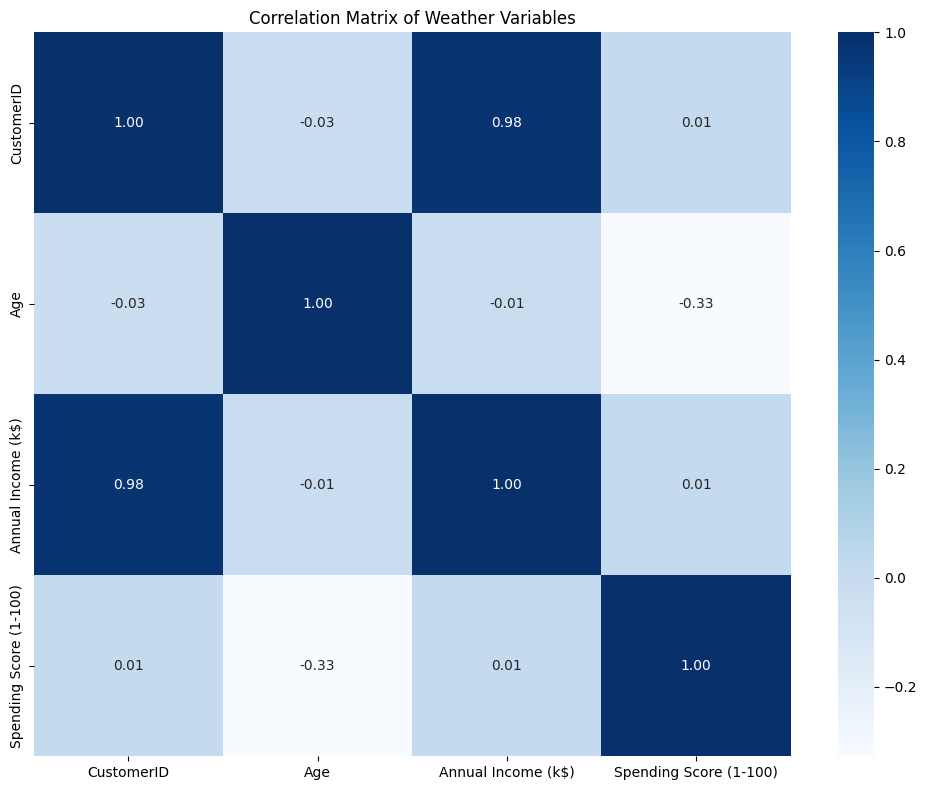

In [88]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Weather Variables')
plt.tight_layout()
plt.show()

* Weak correlations between most variables

* Strongest negative correlation (-0.33) between Age and Spending Score, suggesting younger customers tend to spend more

# Gender distribution

In [74]:
# Count of each gender
gender_counts = df['Genre'].value_counts()
gender_counts



,count
Genre,
Female,112
Male,88


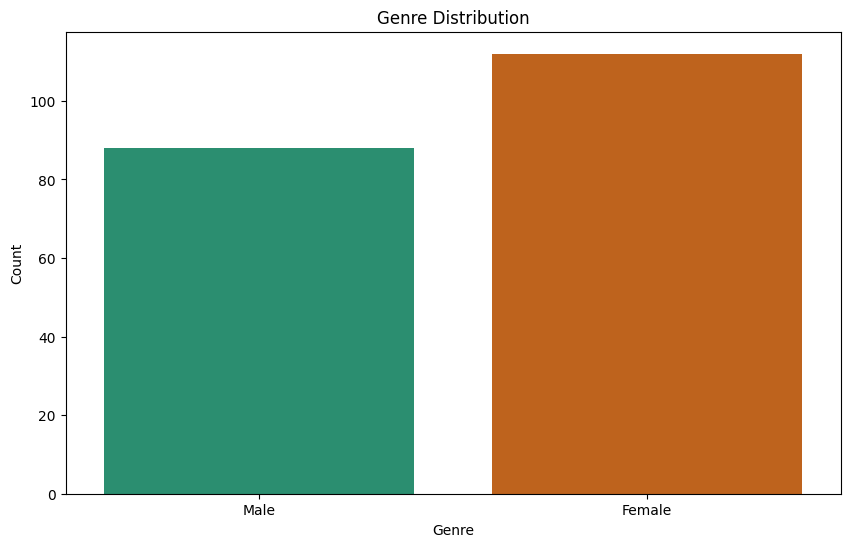

In [90]:
plt.figure(figsize=(10,6))
# Create the plot
sns.countplot(x='Genre', data=df, palette='Dark2')

# Adding title and axis labels
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')

# Display the plot
plt.show()

# Age distribution

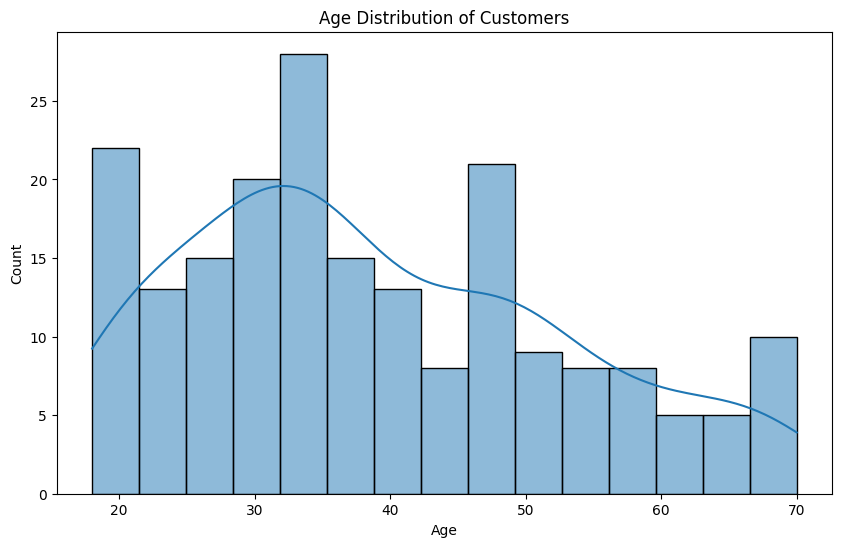

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

#### Age Distribution

* Most customers are between 25–40 years.

* It's slightly right-skewed, meaning there are fewer older customers.

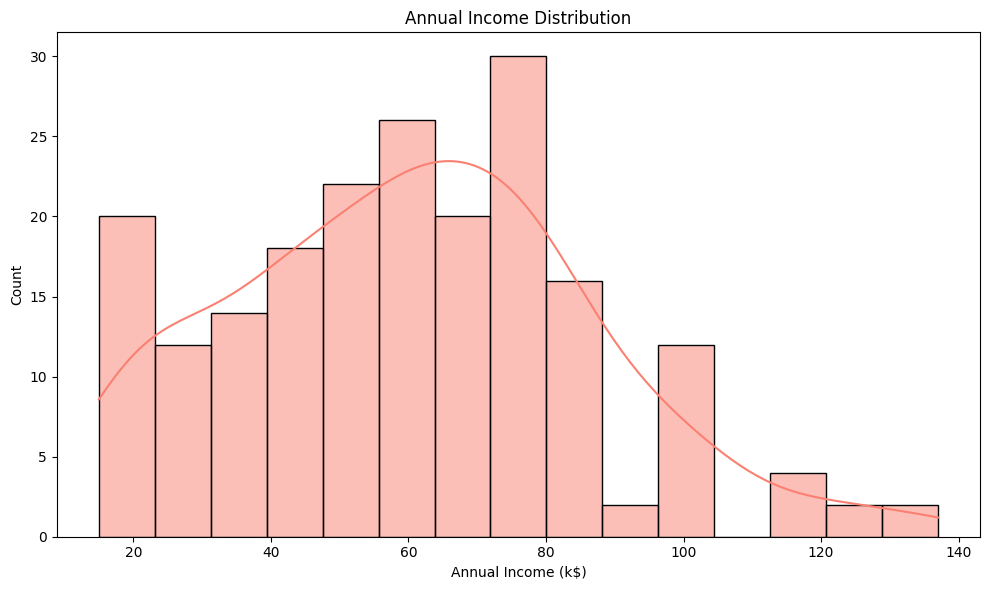

In [62]:
#  Annual Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15, color='salmon')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Annual Income

* Income is fairly spread out.

* Most customers earn between $40k–$80k annually.

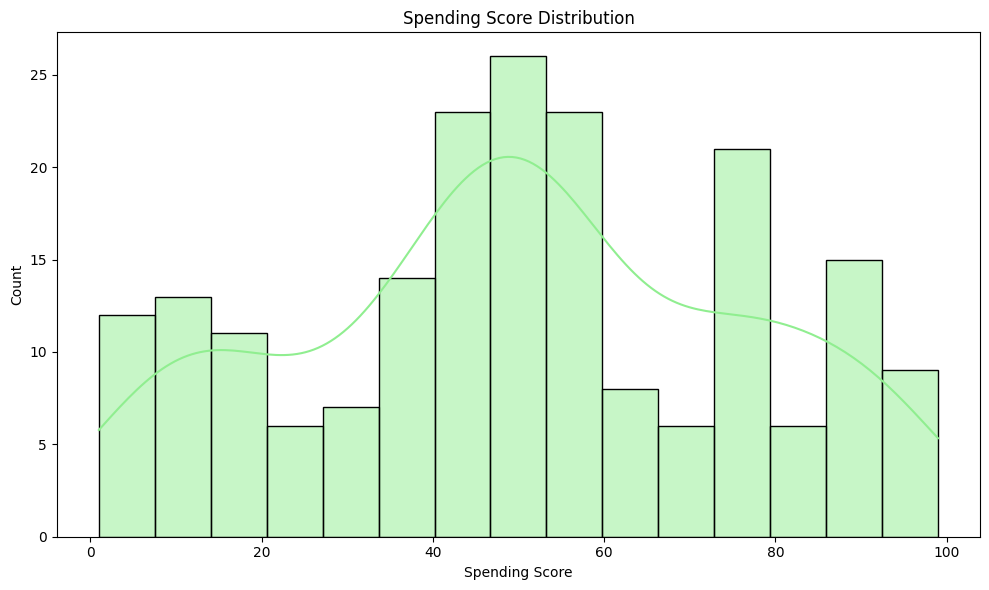

In [63]:
#  Spending Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15, color='lightgreen')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Spending Score

* Bimodal distribution: Some customers spend a lot (scores 70–100), while others spend very little (scores 1–30).

* Very few customers fall in the middle.

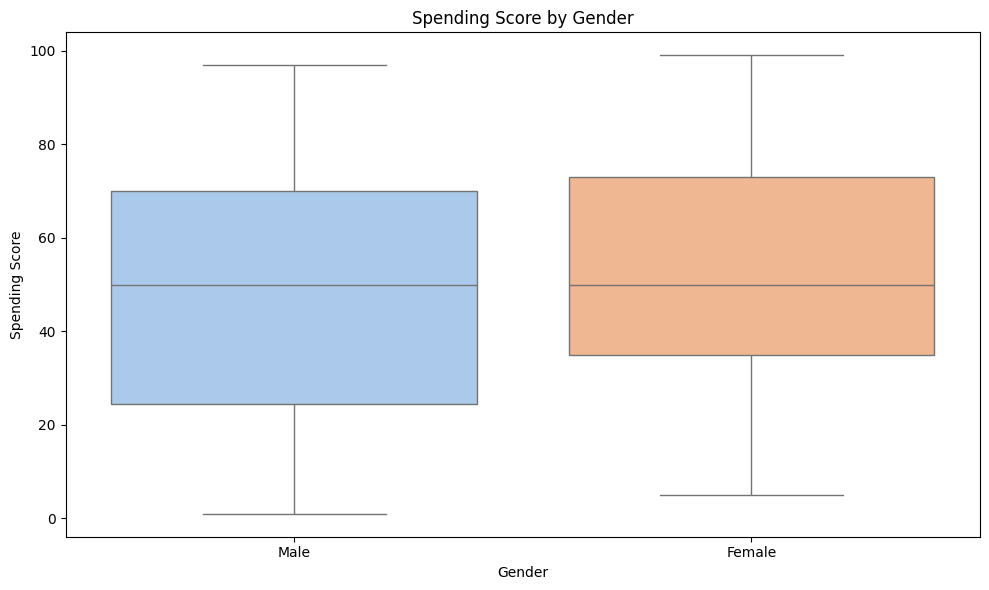

In [64]:

#  Gender-wise spending score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='pastel')
plt.title("Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()

#### Spending Score by Gender

* Both genders have similar spread in spending scores.

* Slightly higher median score for females.

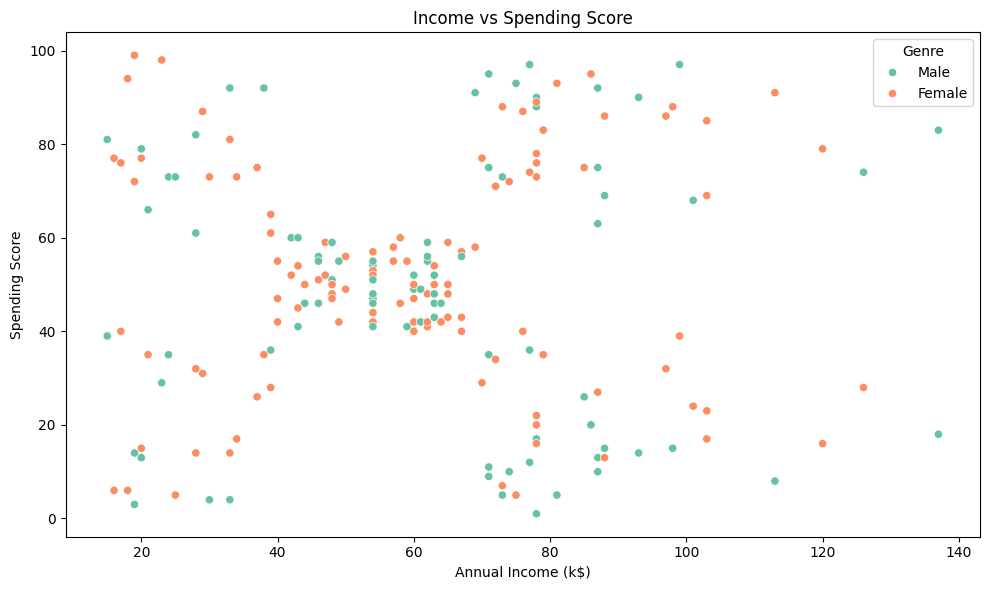

In [65]:
#  Income vs Spending Score scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df, palette='Set2')
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()

#### Scatter Plot (Income vs Spending)

* There’s no clear linear relationship.

* Some low-income customers spend a lot, and some high-income customers spend very little.

* Suggests different customer personas.

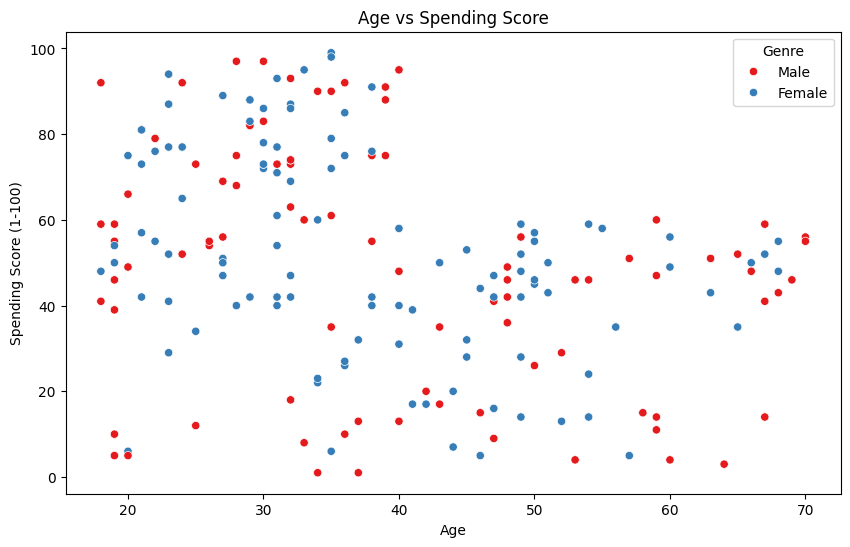

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=df, palette='Set1')
plt.title('Age vs Spending Score')
plt.show()

# Customer Segmentation (K-Means Clustering)

In [67]:


# Selecting features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

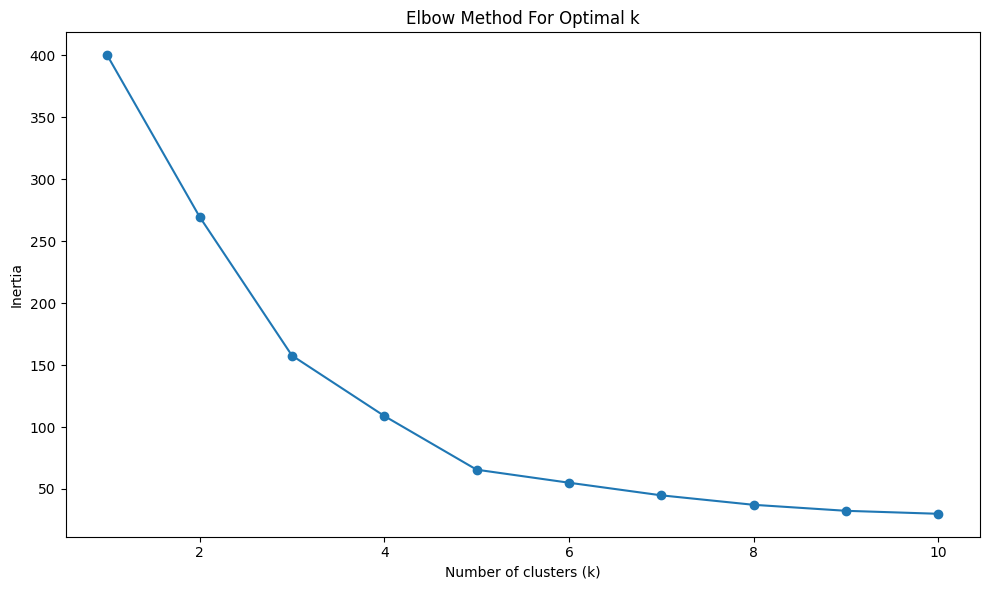

In [68]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

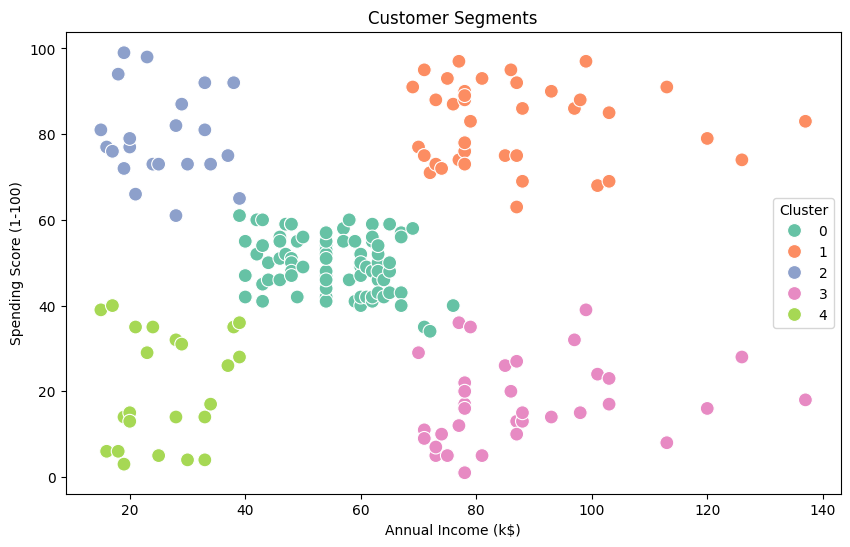

In [69]:
#  Apply K-Means with optimal k (let’s say 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

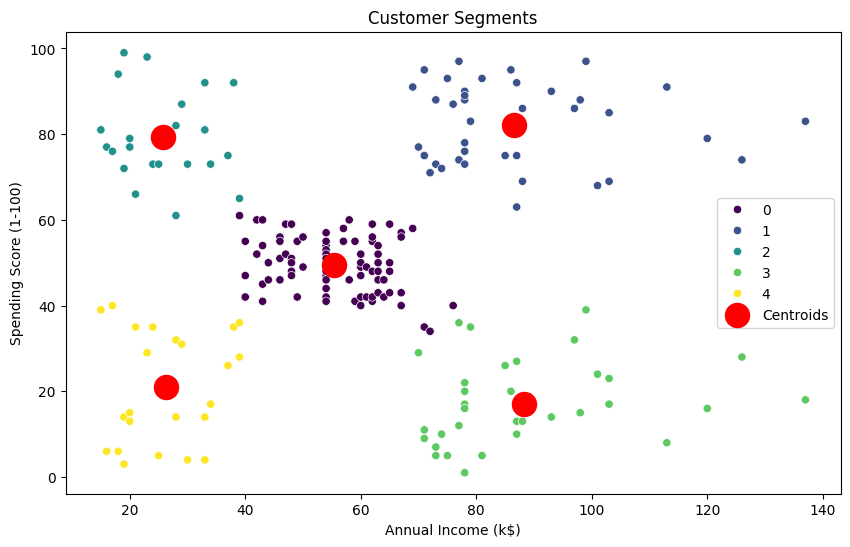

In [70]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.legend()
plt.show()

### Customer Segmentation (K-Means Clustering)
* Optimal number of clusters determined to be 5 using the elbow method

* Clusters were created based on Annual Income and Spending Score

* Visualization shows distinct customer segments:

1. High income, high spending

2. High income, low spending

3. Medium income, medium spending

4. Low income, high spending

5. Low income, low spending

In [71]:

#  Check sample data with clusters
df[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


# Mall Customer Segmentation Analysis

## 1. Project Overview
**Objective**: Analyze mall customer data to identify spending patterns and segment customers for targeted marketing.

**Dataset**: 200 customers with 5 features:
- `CustomerID`
- `Genre` (Gender)
- `Age` 
- `Annual Income (k$)` 
- `Spending Score (1-100)`

**Tools Used**: Python (Pandas, Seaborn, Matplotlib, Scikit-learn)

## 2. Key Findings

- **Gender**: 56% Female, 44% Male
- **Age**: Most customers 25-40 years old
- **Spending**:
  - High (70-100) vs Low (1-30) groups
  - Younger customers spend more
- **Income**: Mostly $40k-$80k

### A. Customer Segments
1. **High Spenders** (Clusters 2 & 4):
   - Low/Medium income but spend a lot
   - Target with exclusive offers

2. **Low Spenders** (Clusters 1 & 3):
   - High/Low income but spend little
   - Offer discounts and loyalty rewards


### B. Demographic Trends
- **Gender Distribution**: 56% Female, 44% Male
- **Age Distribution**: Majority aged 25-40; younger customers (18-30) show higher spending
- **Income Spread**: Most earn $40k-$80k annually, with no extreme outliers

### C. Spending Behavior
- **Bimodal Spending**:
  - High Spenders: Scores 70-100 (likely impulsive buyers)
  - Low Spenders: Scores 1-30 (budget-conscious)
- **Gender Difference**: Females have slightly higher median spending
- **Income vs. Spending**: No linear correlation - some low-income customers spend aggressively

### D. Correlation Findings
- **Strongest Trend**: Negative correlation (-0.33) between Age and Spending Score (younger = spend more)
- **Income & Spending**: Weak correlation (0.01), indicating income alone doesn't predict habits

### E. Clustering Results (K-Means)
**Optimal Clusters**: 5 (determined via the Elbow Method)

**Segment Profiles**:

| Cluster | Income       | Spending | Interpretation               |
|---------|--------------|----------|------------------------------|
| 0       | Medium-High  | Medium   | Balanced spenders            |
| 1       | High         | Low      | Wealthy but frugal           |
| 2       | Low          | High     | Young, impulsive spenders    |
| 3       | Low          | Low      | Budget-focused               |
| 4       | Medium       | High     | Prime targets for promotions |

## 3. Recommendations for Mall Management

### A. Targeted Campaigns
**High Spenders (Clusters 2 & 4)**:
- Offer VIP memberships or early access to sales
- Promote luxury/premium brands

**Low Spenders (Clusters 1 & 3)**:
- Discounts on bulk purchases or essentials
- Loyalty points to incentivize spending

### B. Age-Specific Strategies
- **Youth (18-30)**: Social media-driven campaigns (e.g., Instagram flash sales)
- **Older (50+)**: Senior discounts or wellness-focused retail partnerships

### C. Gender-Based Approaches
- **Female Shoppers**: Collaborate with beauty/fashion brands for exclusive deals
- **Male Shoppers**: Analyze niche interests (e.g., tech, sports) for tailored ads

